In [1]:
import pandas as pd              # Veri okuma, temizleme ve tablo işlemleri için
import numpy as np               # Sayısal işlemler ve istatistikler için
import matplotlib.pyplot as plt  # Çizgi, çubuk, pasta grafikleri için
import seaborn as sns            # Isı haritası, pairplot ve stilli grafikler için

In [2]:
data = pd.read_csv("/kaggle/input/world-happiness/2019.csv")
data2018 = pd.read_csv("/kaggle/input/world-happiness/2018.csv")
data2017 = pd.read_csv("/kaggle/input/world-happiness/2017.csv")
data2016 = pd.read_csv("/kaggle/input/world-happiness/2016.csv")
data2015 = pd.read_csv("/kaggle/input/world-happiness/2015.csv")
df = data.copy()
df18 = data2018.copy()
df17 = data2017.copy()
df16 = data2016.copy()
df15 = data2015.copy()

In [3]:
df.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [4]:
df.tail()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035
155,156,South Sudan,2.853,0.306,0.575,0.295,0.010,0.202,0.091


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


In [6]:
df.describe()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,78.500000,5.407096,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603
std,45.177428,1.113120,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538
min,1.000000,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,4.544500,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000
50%,78.500000,5.379500,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500
75%,117.250000,6.184500,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250
max,156.000000,7.769000,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000


In [7]:
df.shape

(156, 9)

In [8]:
df.isnull().sum()

Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64

Text(0.5, 1.0, 'En Mutlu 10 Ülke')

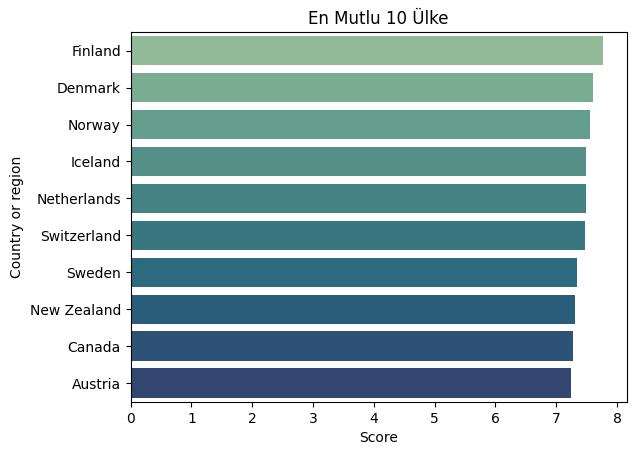

In [9]:
top10 = df.sort_values("Score", ascending=False).head(10)
bottom10 = df.sort_values("Score").head(10)

sns.barplot(data=top10, x="Score", y="Country or region", palette="crest")
plt.title("En Mutlu 10 Ülke")

Text(0.5, 1.0, 'En Az Mutlu 10 Ülke')

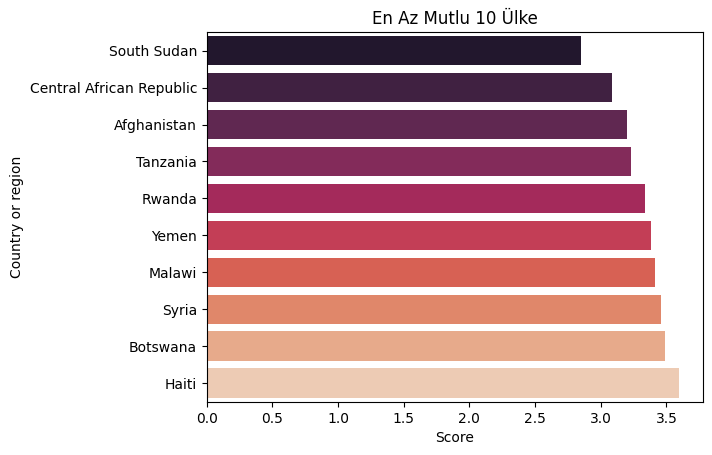

In [10]:
sns.barplot(data=bottom10, x="Score", y="Country or region", palette="rocket")
plt.title("En Az Mutlu 10 Ülke")

Text(0.5, 1.0, 'Değişkenler Arası Korelasyon')

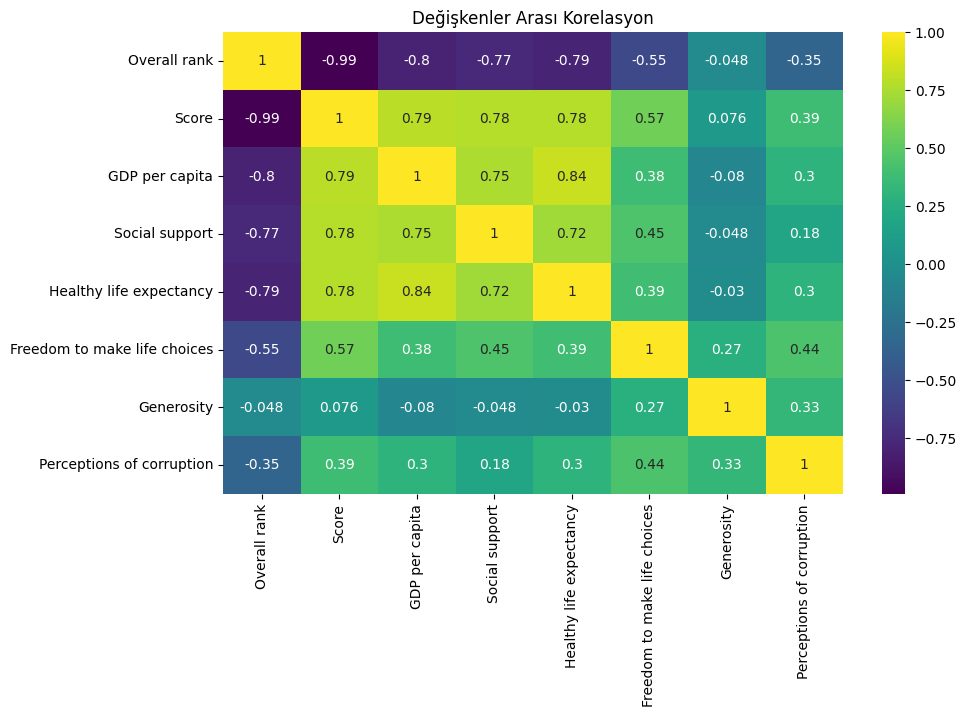

In [11]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="viridis")
plt.title("Değişkenler Arası Korelasyon")

Text(0.5, 1.0, 'Gelir ve Mutluluk Arasındaki Doğrusal İlişki')

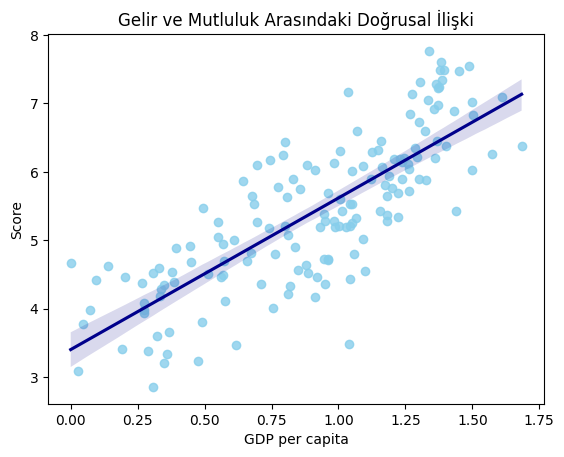

In [12]:
sns.regplot(data=df, x="GDP per capita", y="Score", scatter_kws={"color": "skyblue"}, line_kws={"color": "darkblue"})
plt.title("Gelir ve Mutluluk Arasındaki Doğrusal İlişki")

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


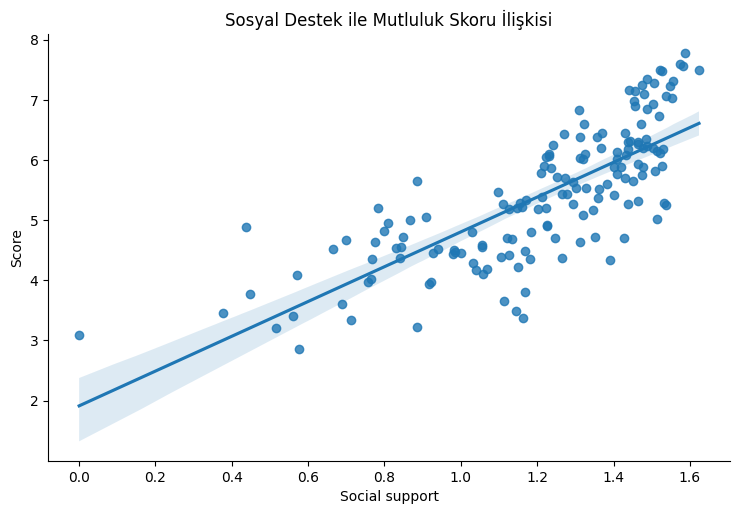

In [13]:
sns.lmplot(data=df, x="Social support", y="Score", height=5, aspect=1.5)
plt.title("Sosyal Destek ile Mutluluk Skoru İlişkisi")
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


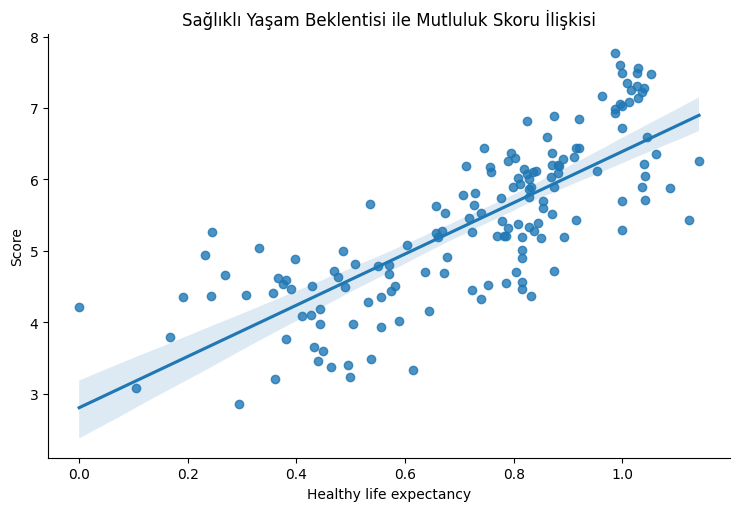

In [14]:
sns.lmplot(data=df, x="Healthy life expectancy", y="Score", height=5, aspect=1.5)
plt.title("Sağlıklı Yaşam Beklentisi ile Mutluluk Skoru İlişkisi")
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


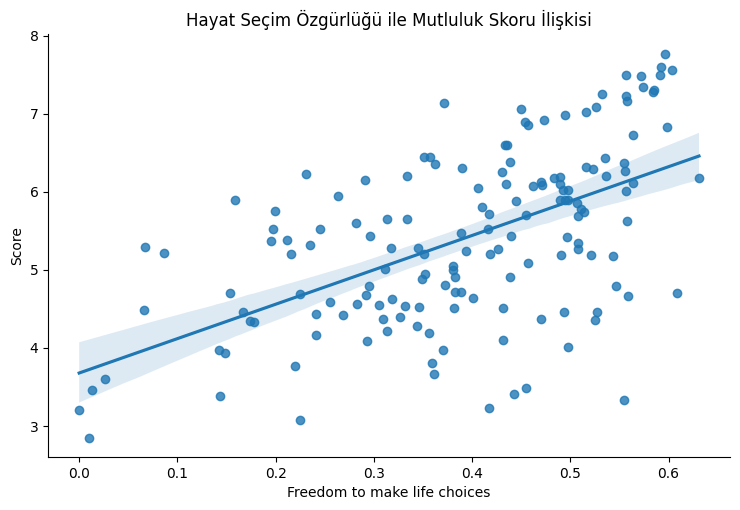

In [15]:
sns.lmplot(data=df, x="Freedom to make life choices", y="Score", height=5, aspect=1.5)
plt.title("Hayat Seçim Özgürlüğü ile Mutluluk Skoru İlişkisi")
plt.show()

In [16]:
print(df.columns)
print(df18.columns)
print(df17.columns)
print(df16.columns)
print(df15.columns)

Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')
Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')
Index(['Country', 'Happiness.Rank', 'Happiness.Score', 'Whisker.high',
       'Whisker.low', 'Economy..GDP.per.Capita.', 'Family',
       'Health..Life.Expectancy.', 'Freedom', 'Generosity',
       'Trust..Government.Corruption.', 'Dystopia.Residual'],
      dtype='object')
Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Lower Confidence Interval', 'Upper Confidence Interval',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', '

In [17]:
# Yıllara göre bazı sütun isimleri farklı bunları gideriyoruz
def rename_15_16(df):
    df = df.rename(columns={
        "Country or region": "Country",
        "Score": "Happiness Score",
        "GDP per capita": "Economy (GDP per Capita)",
        "Social support": "Family",
        "Healthy life expectancy": "Health (Life Expectancy)",
        "Freedom to make life choices": "Freedom",
        "Perceptions of corruption": "Trust (Government Corruption)"
    })
    return df

In [18]:
df15r = rename_15_16(df15)
df16r = rename_15_16(df16)

turkey15 = df15r[df15r["Country"] == "Turkey"]
turkey16 = df16r[df16r["Country"] == "Turkey"]
turkey17 = df17[df17["Country"] == "Turkey"]
turkey18 = df18[df18["Country or region"] == "Turkey"] 
turkey19 = df[df["Country or region"] == "Turkey"]

turkey18 = turkey18.rename(columns={"Country or region": "Country"})
turkey19 = turkey19.rename(columns={"Country or region": "Country"})

In [19]:
turkey_all_years = pd.concat([turkey15, turkey16, turkey17, turkey18, turkey19], ignore_index=True)
turkey_all_years["Year"] = [2015, 2016, 2017, 2018, 2019]

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

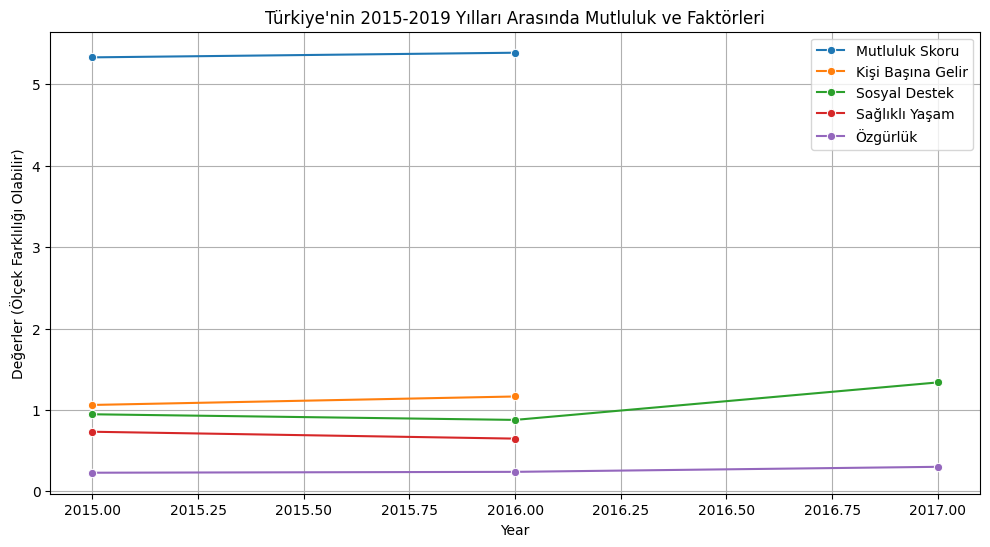

In [20]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=turkey_all_years, x="Year", y="Happiness Score", marker='o', label="Mutluluk Skoru")
sns.lineplot(data=turkey_all_years, x="Year", y="Economy (GDP per Capita)", marker='o', label="Kişi Başına Gelir")
sns.lineplot(data=turkey_all_years, x="Year", y="Family", marker='o', label="Sosyal Destek")
sns.lineplot(data=turkey_all_years, x="Year", y="Health (Life Expectancy)", marker='o', label="Sağlıklı Yaşam")
sns.lineplot(data=turkey_all_years, x="Year", y="Freedom", marker='o', label="Özgürlük")

plt.title("Türkiye'nin 2015-2019 Yılları Arasında Mutluluk ve Faktörleri")
plt.ylabel("Değerler (Ölçek Farklılığı Olabilir)")
plt.legend()
plt.grid(True)
plt.show()